In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
import warnings
warnings.simplefilter(action="ignore")
import datetime as dt
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
data = pd.read_excel("Germany.xlsx")

In [3]:
data.drop("Unnamed: 0", axis=1, inplace=True)

In [4]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,Day of Week
0,489526,85049E,SCANDINAVIAN REDS RIBBONS,12,2009-12-01 11:50:00,1.25000,12533,Germany,15.00000,Tuesday
1,489526,21976,PACK OF 60 MUSHROOM CAKE CASES,24,2009-12-01 11:50:00,0.55000,12533,Germany,13.20000,Tuesday
2,489526,21498,RED SPOTS WRAP,25,2009-12-01 11:50:00,0.42000,12533,Germany,10.50000,Tuesday
3,489526,22077,6 RIBBONS RUSTIC CHARM,12,2009-12-01 11:50:00,1.65000,12533,Germany,19.80000,Tuesday
4,489526,84946,ANTIQUE SILVER TEA GLASS ETCHED,12,2009-12-01 11:50:00,1.25000,12533,Germany,15.00000,Tuesday


In [5]:
data.shape

(13792, 10)

In [6]:
data.groupby("Invoice").agg({"Description" : "count"}).sort_values("Description", ascending=False).head()

,Description
Invoice,
540458,138
555383,129
537201,124
514387,118
495310,105


In [7]:
data.groupby("Invoice").agg({"Description" : "count"}).describe().T

,count,mean,std,min,25%,50%,75%,max
Description,717.00000,19.23570,18.16595,1.00000,7.00000,15.00000,25.00000,138.00000


array([[<AxesSubplot:title={'center':'Description'}>]], dtype=object)

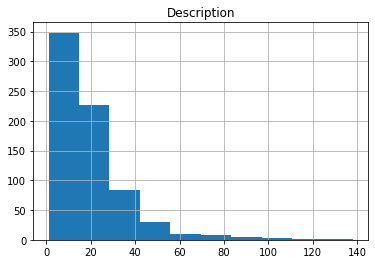

In [8]:
data.groupby("Invoice").agg({"Description" : "count"}).hist()

In [9]:
products = {}
for i in data["Invoice"]:
    products[i] = list(data[data["Invoice"] == i ]["Description"])

In [10]:
normal_baskets = {}
large_baskets = {}
for i,j in products.items():
    if len(j) < 50:
        normal_baskets[i] = j
    else:
        large_baskets[i] = j

In [11]:
max_len = 0 
for i in normal_baskets.values():
    if len(i) > max_len:
        max_len = len(i)

In [12]:
max_len 

47

In [13]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
oht_ary = te.fit(normal_baskets.values()).transform(normal_baskets.values(), sparse=True)
sparse_df = pd.DataFrame.sparse.from_spmatrix(oht_ary, columns=te.columns_)
sparse_df.head()

3 STRIPEY MICE FELTCRAFT   50'S CHRISTMAS GIFT BAG LARGE  \
0                          0                               0   
1                          0                               0   
2                          0                               0   
3                          1                               0   
4                          0                               0   

    CHERRY BLOSSOM  DECORATIVE FLASK   DOLLY GIRL BEAKER  \
0                                  0                   0   
1                                  0                   0   
2                                  0                   0   
3                                  0                   0   
4                                  0                   0   

    I LOVE LONDON MINI BACKPACK   RED SPOT GIFT BAG LARGE  \
0                             0                         0   
1                             0                         0   
2                             0                         0   
3                             0                         0   
4                             0                         0   

    RED/WHITE DOT MINI CASES   SET 2 TEA TOWELS I LOVE LONDON   \
0                          0                                 0   
1                          0                                 0   
2                          0                                 0   
3                          0                                 0   
4                          0                                 0   

   10 COLOUR SPACEBOY PEN  12 COLOURED PARTY BALLOONS  \
0                       0                           0   
1                       0                           0   
2                       0                           0   
3                       0                           0   
4                       0                           0   

   12 IVORY ROSE PEG PLACE SETTINGS  12 MESSAGE CARDS WITH ENVELOPES  \
0                                 0                                0   
1                                 0                                0   
2                                 0                                0   
3                                 0                                0   
4                                 0                                0   

   12 MINI TOADSTOOL PEGS  12 PENCIL SMALL TUBE WOODLAND  \
0                       0                              0   
1                       0                              0   
2                       0                              0   
3                       0                              0   
4                       0                              0   

   12 PENCILS SMALL TUBE RED RETROSPOT  12 PENCILS SMALL TUBE RED SPOTTY  \
0                                    0                                 0   
1                                    0                                 0   
2                                    0                                 0   
3                                    0                                 0   
4                                    0                                 0   

   12 PENCILS SMALL TUBE SKULL  12 PENCILS TALL TUBE POSY  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   12 PENCILS TALL TUBE RED RETROSPOT  12 PENCILS TALL TUBE RED SPOTTY  \
0                                   0                                0   
1                                   0                                0   
2                                   0                                0   
3                                   0                                0   
4                                   0                                0   

   12 PENCILS TALL TUBE SKULLS  12 PENCILS TALL TUBE WOODLAND  \
0                      

In [14]:
sparse_df.shape

(674, 1932)

In [15]:
freq_items = apriori(sparse_df, min_support=0.05, use_colnames=True, verbose=1)
freq_items['length'] = freq_items['itemsets'].apply(lambda x: len(x))
freq_items.sort_values("support", ascending=False)

Processing 36 combinations | Sampling itemset size 3


,support,itemsets,length
17,0.25964,(ROUND SNACK BOXES SET OF4 WOODLAND ),1
16,0.16024,(ROUND SNACK BOXES SET OF 4 FRUITS ),1
22,0.14392,(WOODLAND CHARLOTTE BAG),1
14,0.13501,(PLASTERS IN TIN WOODLAND ANIMALS),1
30,0.12908,"(ROUND SNACK BOXES SET OF4 WOODLAND , ROUND SN...",2
15,0.12166,(RED TOADSTOOL LED NIGHT LIGHT),1
11,0.11573,(PLASTERS IN TIN CIRCUS PARADE ),1
0,0.09792,(6 RIBBONS RUSTIC CHARM),1
12,0.09496,(PLASTERS IN TIN SPACEBOY),1
6,0.08605,(JUMBO BAG WOODLAND ANIMALS),1


In [16]:
freq_items.shape

(32, 3)

In [18]:
final_df = association_rules(freq_items, metric = "confidence", min_threshold = 0.3)
final_df.sort_values(by="lift", ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN CIRCUS PARADE ),0.13501,0.11573,0.06973,0.51648,4.46295,0.05411,1.82884
1,(PLASTERS IN TIN CIRCUS PARADE ),(PLASTERS IN TIN WOODLAND ANIMALS),0.11573,0.13501,0.06973,0.60256,4.46295,0.05411,2.17641
3,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN SPACEBOY),0.13501,0.09496,0.05193,0.38462,4.05048,0.03911,1.47070
4,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN WOODLAND ANIMALS),0.09496,0.13501,0.05193,0.54688,4.05048,0.03911,1.90893
7,(ROUND SNACK BOXES SET OF4 WOODLAND ),(ROUND SNACK BOXES SET OF 4 FRUITS ),0.25964,0.16024,0.12908,0.49714,3.10254,0.08748,1.66998
8,(ROUND SNACK BOXES SET OF 4 FRUITS ),(ROUND SNACK BOXES SET OF4 WOODLAND ),0.16024,0.25964,0.12908,0.80556,3.10254,0.08748,3.80755
5,(PLASTERS IN TIN WOODLAND ANIMALS),(ROUND SNACK BOXES SET OF4 WOODLAND ),0.13501,0.25964,0.06677,0.49451,1.90455,0.03171,1.46462
9,(WOODLAND CHARLOTTE BAG),(ROUND SNACK BOXES SET OF4 WOODLAND ),0.14392,0.25964,0.06973,0.48454,1.86616,0.03237,1.43629
2,(PLASTERS IN TIN CIRCUS PARADE ),(ROUND SNACK BOXES SET OF4 WOODLAND ),0.11573,0.25964,0.05341,0.46154,1.77758,0.02336,1.37495
6,(RED TOADSTOOL LED NIGHT LIGHT),(ROUND SNACK BOXES SET OF4 WOODLAND ),0.12166,0.25964,0.05490,0.45122,1.73784,0.02331,1.34909
